In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"

In [0]:
import urllib.request
urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/myxxxx.csv")
dbutils.fs.mv("file:/tmp/myxxxx.csv", "dbfs:/laioffer/spark_hw1/data/sf_03_01.csv")
display(dbutils.fs.ls("dbfs:/laioffer/spark_hw1/data/"))

path,name,size,modificationTime
dbfs:/laioffer/spark_hw1/data/sf_03_01.csv,sf_03_01.csv,550945238,1741453342000
dbfs:/laioffer/spark_hw1/data/sf_03_18.csv,sf_03_18.csv,550945238,1740853256000


In [0]:
data_path = "dbfs:/laioffer/spark_hw1/data/sf_03_01.csv"

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)

In [0]:
from pyspark import SparkConf
SparkConf().getAll()

Out[5]: [('spark.executor.extraClassPath',
  '/databricks/spark/dbconf/log4j/executor:/databricks/spark/dbconf/jets3t/:/databricks/spark/dbconf/hadoop:/databricks/hive/conf:/databricks/jars/*'),
 ('spark.executor.memory', '8278m'),
 ('spark.executor.extraJavaOptions',
  '-Djava.io.tmpdir=/local_disk0/tmp -XX:ReservedCodeCacheSize=512m -XX:+UseCodeCacheFlushing -XX:PerMethodRecompilationCutoff=-1 -XX:PerBytecodeRecompilationCutoff=-1 -Djava.security.properties=/databricks/spark/dbconf/java/extra.security -XX:-UseContainerSupport -XX:+PrintFlagsFinal -XX:+PrintGCDateStamps -XX:+PrintGCDetails -verbose:gc -Xss4m -Djava.library.path=/usr/java/packages/lib/amd64:/usr/lib64:/lib64:/lib:/usr/lib:/usr/lib/x86_64-linux-gnu/jni:/lib/x86_64-linux-gnu:/usr/lib/x86_64-linux-gnu:/usr/lib/jni -Djavax.xml.datatype.DatatypeFactory=com.sun.org.apache.xerces.internal.jaxp.datatype.DatatypeFactoryImpl -Djavax.xml.parsers.DocumentBuilderFactory=com.sun.org.apache.xerces.internal.jaxp.DocumentBuilderFactory

In [0]:
df_opt1.count()

Out[6]: 2129525

In [0]:
type(df_opt1)

Out[7]: pyspark.sql.dataframe.DataFrame


**Q1 question:**
Write a Spark program that counts the number of crimes for different category.
Below are some example codes to demonstrate the way to use Spark RDD, DF, and SQL to work with big data. You can follow this example to finish other questions.

In [0]:

spark_sql_q1 = spark.sql("SELECT category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")

display(spark_sql_q1)
 

category,Count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


In [0]:

spark_df_q1 = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(spark_df_q1)


category,count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


In [0]:
crimes_pd_df = spark_sql_q1.toPandas()

display(crimes_pd_df)
print (type(crimes_pd_df))

category,Count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


<class 'pandas.core.frame.DataFrame'>


<Figure size 432x288 with 0 Axes>

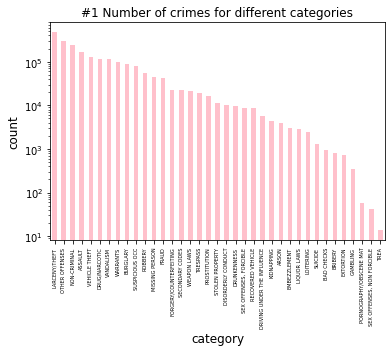

In [0]:
plt.figure()

ax = crimes_pd_df.plot(kind = 'bar',x = 'category',y = 'Count',logy= True,color = 'pink',legend = False, align = 'center')
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('category',fontsize = 12)
plt.xticks(fontsize=5, rotation=90)
plt.title('#1 Number of crimes for different categories')
display()


**Q2 question**
Counts the number of crimes for different district, and visualize your results

In [0]:
spark_sql_q2 = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC")
display(spark_sql_q2)

PdDistrict,Count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


<Figure size 432x288 with 0 Axes>

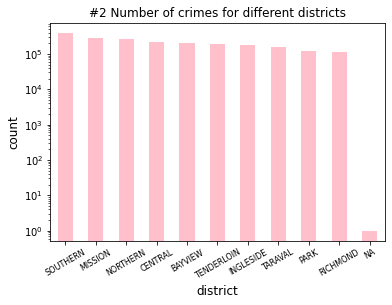

In [0]:
crimes_dis_pd_df = spark_sql_q2.toPandas()
plt.figure()

ax = crimes_dis_pd_df.plot(kind = 'bar',x='PdDistrict',y = 'Count',logy= True,color = 'pink',legend = False, align = 'center')
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('district',fontsize = 12)
plt.xticks(fontsize=8, rotation=30)
plt.title('#2 Number of crimes for different districts')
display()


**Q3 question**
Count the number of crimes each "Sunday" at "SF downtown".
hint 1: SF downtown is defiend via the range of spatial location. For example, you can use a rectangle to define the SF downtown, or you can define a cicle with center as well. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range. You can follow the example here: https://changhsinlee.com/pyspark-udf/

hint 2: SF downtown 物理范围可以是 rectangle a < x < b and c < y < d. thus, San Francisco Latitude and longitude coordinates are: 37.773972, -122.431297. X and Y represents each. So we assume SF downtown spacial range: X (-122.4213,-122.4313), Y(37.7540,37.7740). 也可以是中心一个圈，距离小于多少算做downtown

In [0]:
q3_result = spark.sql("""
                      with Sunday_dt_crime as(
                      select substring(Date,1,5) as Date,
                             substring(Date,7) as Year
                      from sf_crime
                      where (DayOfWeek = 'Sunday'
                             and -122.423671 < X
                             and X < 122.412497
                             and 37.773510 < Y
                             and Y < 37.782137)
                             )
                             
                      select Year, Date, COUNT(*) as Count
                      from Sunday_dt_crime
                      group by Year, Date
                      order by Year, Date
                      """)
display(q3_result)

Year,Date,Count
2003,01/05,28
2003,01/12,33
2003,01/19,19
2003,01/26,32
2003,02/02,44
2003,02/09,46
2003,02/16,50
2003,02/23,48
2003,03/02,40
2003,03/09,49


**Q4 question**
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [0]:
%sql

select SUBSTRING(Date,1,2) as Month, SUBSTRING(Date,7,4) as Year, count(*) as crime_counts
from sf_crime
group by month, year
having Year in ('2015', '2016', '2017', '2018') 
order by crime_counts desc



Month,Year,crime_counts
03,2015,13463
05,2015,13318
08,2015,13317
03,2017,13250
01,2015,13181
10,2017,12970
07,2015,12949
10,2016,12913
06,2015,12853
05,2017,12758


Databricks visualization. Run in Databricks to view.

**Analysis**:
In March 2015 and May 2015, the there are more than 13000 crime counts. Overal, 2015 has the top 3 crime counts. Oppositely, data in 2018 has lowest crime counts on May, Feb., April and March. 

**Q5 question**
Analyze the number of crime with respsect to the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

In [0]:
%sql

select substring(time,1,2) as hour, count(*) as crime_counts
from sf_crime
where Date like '12/25/%' 
group by hour



hour,crime_counts
07,62
15,167
11,138
01,133
22,175
16,159
18,169
00,208
17,146
09,82


Databricks visualization. Run in Databricks to view.

In [0]:
%sql
select substring(time,1,2) as hour, count(*) as crime_counts
from sf_crime
where Date like '10/25/%' 
group by hour

hour,crime_counts
07,146
15,329
11,263
01,174
22,289
16,346
18,389
00,284
17,366
09,229


Databricks visualization. Run in Databricks to view.

Analysis/Suggestion:

According to the visualization, it is not very safe for going out at night, but also at noon at Christmas. I also visualized a random day just to want to see if Chistmas would have higher crime counts comparing with normal day, but the results showing that a normal day might have even higher crime counts. So, in my opinion, it is not really safe no matter its on holiday or its just a regular day. Be careful while travelling. 

**Q6 question**
(1) Step1: Find out the top-3 danger disrict
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1
(3) give your advice to distribute the police based on your analysis results.


According to step1, the three most dangerous districts are SOUTHERN, MISSION and NORTHERN.
We can see from the picture above that among the top three dangerous streets, the crime rate around 5 am is the lowest, and the high incidence of crime rate is around 12pm and 18pm, especially pay attention to theft, so I recommend to increase police patrol during that periods.

In [0]:
%sql

select PdDistrict, count(*) as crime_counts
from sf_crime
group by PdDistrict
order by crime_counts desc
limit 3

PdDistrict,crime_counts
SOUTHERN,390692
MISSION,288985
NORTHERN,266435


Databricks visualization. Run in Databricks to view.

In [0]:
%sql

select category, substring(time, 1,2) as hour, count(*) as crime_counts
from sf_crime
where PdDistrict in ('SOUTHERN', 'MISSION', 'NORTHERN')
group by category, hour
order by category, hour

category,hour,crime_counts
ARSON,00,84
ARSON,01,77
ARSON,02,84
ARSON,03,95
ARSON,04,74
ARSON,05,60
ARSON,06,50
ARSON,07,28
ARSON,08,34
ARSON,09,28


Databricks visualization. Run in Databricks to view.

**Q7 question**
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

In [0]:
%sql

WITH resolution_counts AS (
    -- 计算每个 (category, Resolution) 组合的数量，包括 'NONE'
    SELECT category, Resolution, COUNT(*) AS resolved
    FROM sf_crime
    GROUP BY category, Resolution
),
total_cases AS (
    -- 计算每个 category 下的总数（包含 'NONE'）
    SELECT category, SUM(resolved) AS total
    FROM resolution_counts
    GROUP BY category
)
SELECT r.category, r.Resolution, r.resolved, t.total,
       ROUND(r.resolved * 100.0 / t.total, 2) AS percentage
FROM resolution_counts r
JOIN total_cases t ON r.category = t.category
WHERE r.Resolution <> 'NONE'  -- 只保留有效的 Resolution 计算 percentage%
ORDER BY percentage DESC;



category,Resolution,resolved,total,percentage
WARRANTS,"ARREST, BOOKED",93092,99821,93.26
DRIVING UNDER THE INFLUENCE,"ARREST, BOOKED",4941,5652,87.42
STOLEN PROPERTY,"ARREST, BOOKED",9693,11450,84.66
DRUG/NARCOTIC,"ARREST, BOOKED",97926,117821,83.11
DRUNKENNESS,"ARREST, BOOKED",7471,9760,76.55
LIQUOR LAWS,"ARREST, BOOKED",1839,2840,64.75
WEAPON LAWS,"ARREST, BOOKED",13334,21004,63.48
LOITERING,"ARREST, CITED",1432,2402,59.62
PROSTITUTION,"ARREST, CITED",9667,16501,58.58
BRIBERY,"ARREST, BOOKED",418,796,52.51


In [0]:
%sql
WITH resolution_counts AS (
    -- 计算每种有效 Resolution 类型的案件数
    SELECT category, Resolution, COUNT(*) AS resolved
    FROM sf_crime
    WHERE Resolution <> 'NONE'  -- ✅ 这里去掉 'NONE'
    GROUP BY category, Resolution
),
total_cases AS (
    -- 计算每个 category 下的所有被解决的案件（也去掉 'NONE'）
    SELECT category, SUM(resolved) AS total
    FROM resolution_counts
    GROUP BY category
)
SELECT r.category, r.Resolution, r.resolved, t.total,
       ROUND(r.resolved * 100.0 / t.total, 2) AS percentage
FROM resolution_counts r
JOIN total_cases t ON r.category = t.category
ORDER BY percentage DESC;


category,Resolution,resolved,total,percentage
WARRANTS,"ARREST, BOOKED",93092,94339,98.68
RECOVERED VEHICLE,"ARREST, BOOKED",564,575,98.09
STOLEN PROPERTY,"ARREST, BOOKED",9693,10011,96.82
DRUNKENNESS,"ARREST, BOOKED",7471,8035,92.98
DRIVING UNDER THE INFLUENCE,"ARREST, BOOKED",4941,5335,92.61
BRIBERY,"ARREST, BOOKED",418,458,91.27
DRUG/NARCOTIC,"ARREST, BOOKED",97926,107565,91.04
ARSON,"ARREST, BOOKED",630,701,89.87
WEAPON LAWS,"ARREST, BOOKED",13334,14934,89.29
BURGLARY,"ARREST, BOOKED",12765,14414,88.56
